In [25]:
#Imports
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("white")
sns.set_context("poster")
import copy
import pfr
import time

In [3]:
# reupload all data to have as one dataset again
df = pd.concat([pd.read_csv('0308plays.csv'),pd.read_csv('0914plays.csv')])
df = df.reset_index(drop=True)

/Users/StevenRachesky/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [4]:
df.shape

(32970, 126)

In [5]:
df.head(2)

,away,bsID,challengeUpheld,challenger,detail,distToGoal,down,exp_pts_after,exp_pts_before,fairCatcher,fgBlockRecoverer,fgBlockRetYds,fgBlocker,fgDist,fgGood,fgKicker,fieldside,fumbForcer,fumbRecFieldside,fumbRecYdLine,fumbRecoverer,fumbRetYds,fumbler,home,home_wp,intFieldside,intRetYds,intYdLine,interceptor,isBlocked,isChallenged,isComplete,isFairCatch,isFieldGoal,isFumble,isInt,isKickoff,isKneel,isLateral,isMuffedCatch,isPass,isPenalty,isPresnapPenalty,isPunt,isRun,isSpike,isTD,isTimeout,isTouchback,isTwoPoint,...,puntYds,punter,qtr_time_remain,quarter,rushDir,rusher,sackYds,sacker1,sacker2,secsElapsedInGame,spikeQB,tackler1,tackler2,target,timeoutNum,timeoutTeam,tm,twoPointSuccess,xpGood,xpKicker,ydLine,yds,yds_to_go,year,is1stHalf,is2ndHalf,half,isHome,secsElapsedInHalf,isLast3minHalf,hm_TO_left,aw_TO_left,tm_score,opp_score,tm_winprob,tm_TO_left,opp_TO_left,margin,addscore,isFGRange,isRedZone,dist_to_1st,yeartm,yeartmdowndist_to_1st,tm_prev_yr_pass,month,day,gameNum,tm_in_season_pass,tm_in_game_pass
0,atl,200309070dal,False,NaN,DunnWa00 up the middle for 4 yards (tackle by ...,75,1,0.6,0.61,NaN,NaN,NaN,NaN,NaN,False,NaN,atl,NaN,NaN,NaN,NaN,NaN,NaN,dal,54.1,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,NaN,NaN,14:55,1,M,DunnWa00,NaN,NaN,NaN,5,NaN,SingAl20,NaN,NaN,NaN,NaN,atl,False,False,NaN,25,4,10,2003,True,False,1,False,5,False,3,3,0,0,45.9,3,3,0,0,False,False,long,2003atl,2003atl1.0long,0.407494,9,7,17,NaN,NaN
1,atl,200309070dal,False,NaN,DunnWa00 left tackle for 3 yards (tackle by El...,71,2,0.3,0.60,NaN,NaN,NaN,NaN,NaN,False,NaN,atl,NaN,NaN,NaN,NaN,NaN,NaN,dal,55.0,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,NaN,NaN,14:18,1,LT,DunnWa00,NaN,NaN,NaN,42,NaN,ElliGr20,NaN,NaN,NaN,NaN,atl,False,False,NaN,29,3,6,2003,True,False,1,False,42,False,3,3,0,0,45.0,3,3,0,0,False,False,medium,2003atl,2003atl2.0medium,0.398148,9,7,17,NaN,0


In [30]:
#Create is pass column
df["RESP"] = df["isPass"]*1.0
df["inFGRange"] = df["isFGRange"]*1.0
df["inRedZone"] = df["isRedZone"]*1.0
df["inLast3minHalf"] = df["isLast3minHalf"]*1.0
df["inDown1"] = (df["down"] == 1.)*1.0
df["inDown2"] = (df["down"] == 2.)*1.0
df["inDown3"] = (df["down"] == 3.)*1.0
df["inQuarter1"] = (df["quarter"] == 1.)*1.0
df["inQuarter2"] = (df["quarter"] == 2.)*1.0
df["inQuarter3"] = (df["quarter"] == 3.)*1.0
df["inQuarter4"] = (df["quarter"] == 4.)*1.0
df["addscore"] = df["tm_score"] + df["opp_score"]

In [9]:
lcols = ['distToGoal',"inDown3","inDown2","inDown1",'inQuarter4',"inQuarter3","inQuarter2","inQuarter1",'secsElapsedInHalf',"margin","yds_to_go","addscore","tm_TO_left","opp_TO_left","inFGRange", "inRedZone", "tm_winprob","inLast3minHalf", "tm_prev_yr_pass","tm_in_season_pass","tm_in_game_pass"]

In [10]:
lcols_c = ["distToGoal", "secsElapsedInHalf", "margin", "yds_to_go", "addscore", "tm_winprob", "tm_prev_yr_pass", "tm_in_season_pass", "tm_in_game_pass"]

In [15]:
len(lcols_c)

9

In [14]:
lcols_i = list(set(lcols) - set(lcols_c))

In [27]:
len(lcols_i)

12

In [44]:
lbl = ["Run", "Pass"]

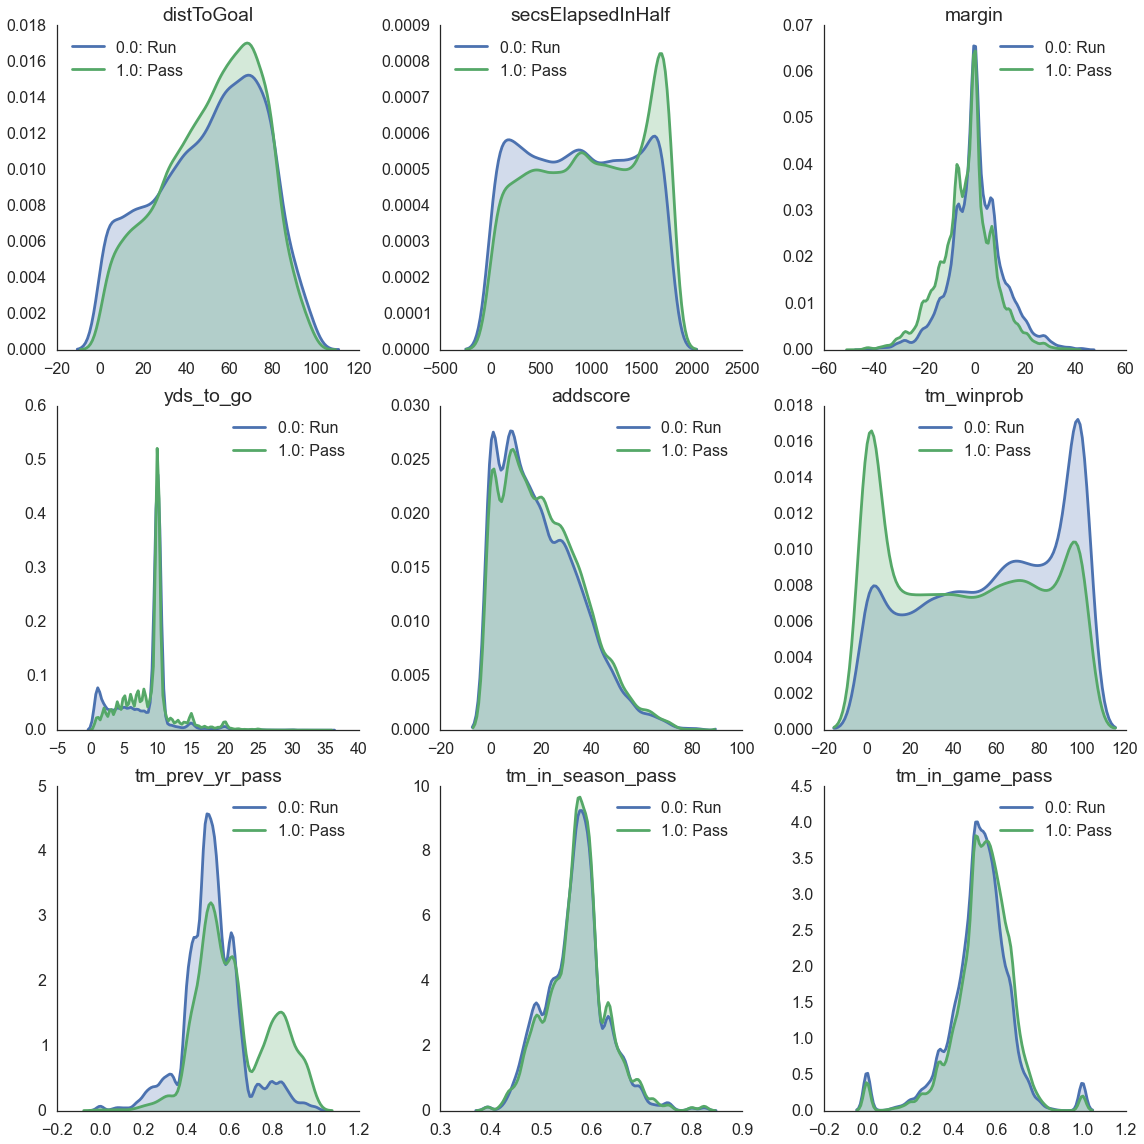

In [51]:
dfgb=df.groupby('RESP')
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16), tight_layout=True)
for ax, p in zip(axes.ravel(), lcols_c):
    for k, v in dfgb[p]:
        sns.kdeplot(v, ax=ax, label=str(k)+": "+lbl[int(k)], shade=True)
        sns.despine()
        ax.set_title(p)
        ax.legend(loc='best')

ERROR! Session/line number was not unique in database. History logging moved to new session 161


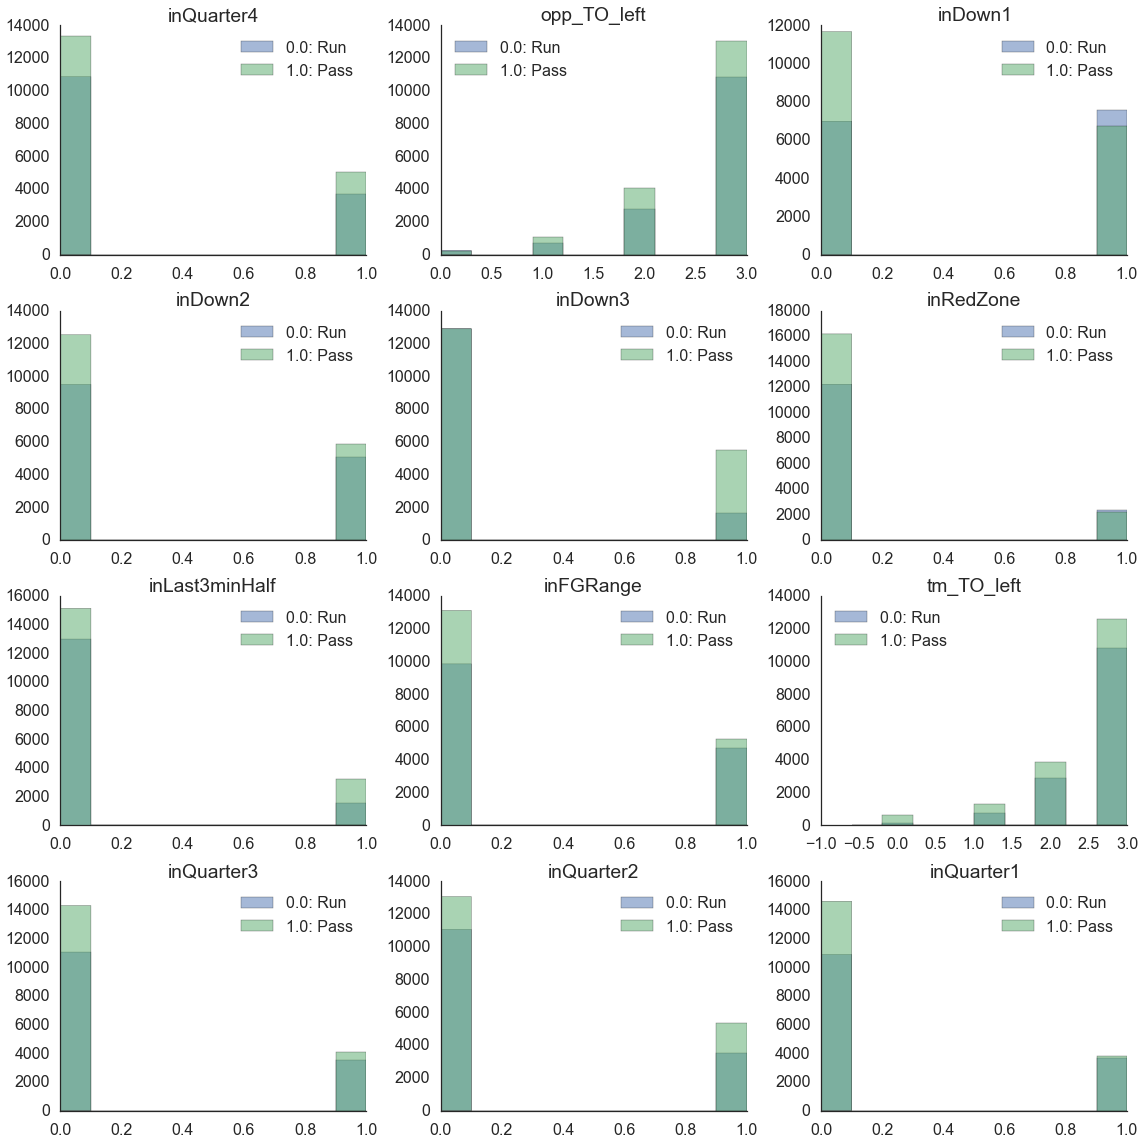

In [66]:
dfgb=df.groupby('RESP')
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 16), tight_layout=True)
for ax, p in zip(axes.ravel(), lcols_i):
    for k, v in dfgb[p]:
        v.hist(ax=ax, alpha=0.5, label=str(k)+": "+lbl[int(k)], stacked=True)
        ax.legend(loc="best")
        ax.grid(False)
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.set_title(p)